In [233]:
import pandas as pd
df = pd.read_csv(r'C:\Users\smaka\Downloads\Cricket.csv')
df.rename(columns = {'Historical Status':'Historical_Status'},inplace = True)
df.rename(columns = {'Report Start Date - Month':'Report_Start_Date_Month'},inplace = True)
#df = df.query('Historical_Status in ("Active","Resigned")')
df['Historical_Status'].value_counts()

Active        474
Terminated     31
Resigned        9
Name: Historical_Status, dtype: int64

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [12]:
X = df
{column : len(X[column].unique()) for column in X.columns}

{'Report Start Date - Year': 1,
 'Report Start Date - Month': 4,
 'CCMS ID': 177,
 'Employee': 177,
 'Manager ID': 14,
 'Manager': 14,
 'Historical_Status': 2,
 'Position Title': 1,
 'Position Group': 1,
 'Position Department': 1,
 'Client': 1,
 'Program': 2,
 'Market': 1,
 'Language': 1,
 'Internal Moves': 3,
 'Salary': 3,
 'Salary "Fixed"': 3,
 'Salary "Variable"': 3,
 'Nationality': 10,
 'Gender': 2,
 'Current Civil Status': 2,
 'Age': 23,
 'Date of Birth': 173,
 'Graduate/Undergrad': 3,
 'Major': 77,
 'University': 74,
 'Location': 1,
 'Address 1': 177,
 'District': 7,
 'Contract Type': 2,
 'Attrition Category': 4,
 'Attrition Type': 6,
 'Attrition Reason': 16,
 'Approved Actions': 6,
 'Canceled Actions': 4,
 'Approved ACM Investigation': 1,
 'Approved Black': 2,
 'Approved Red': 5,
 'Approved Orange': 1,
 'Approved Yellow': 1,
 'Approved Green': 1,
 'Canceled ACM Investigation': 1,
 'Canceled Black': 3,
 'Canceled Red': 4,
 'Canceled Orange': 1,
 'Canceled Yellow': 1,
 'Canceled G

In [77]:
df.select_dtypes('object').columns

Index(['Report Start Date - Year', 'Report Start Date - Month', 'Employee',
       'Manager', 'Historical_Status', 'Position Title', 'Position Group',
       'Position Department', 'Client', 'Program', 'Market', 'Language',
       'Nationality', 'Gender', 'Current Civil Status', 'Date of Birth',
       'Graduate/Undergrad', 'Major', 'University', 'Location', 'Address 1',
       'District', 'Contract Type', 'Attrition Category', 'Attrition Type',
       'Attrition Reason'],
      dtype='object')

In [3]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [229]:
def preprocess_input(df):
    df = df.copy()
    df = df.query("Report_Start_Date_Month in ('January' ,'February' , 'December')")
    df.dropna(how = 'all',axis =1)
    df = df.fillna(0)
    # droping one value columns or null
    df = df.drop(['Report Start Date - Year','CCMS ID','Employee','Manager ID','Manager','Position Title',
 'Position Group',
 'Position Department',
 'Client','Market',
 'Language','Date of Birth','Address 1','Location','Attrition Category',
 'Attrition Type',
 'Attrition Reason','Nationality','University','Major','Program','Current Civil Status','District','Contract Type'], axis=1)
   
    # Binary-encode binary columns
    df['Gender'] = df['Gender'].replace({'F': 0, 'M': 1})
    # Ordinal-encode
    df['Report_Start_Date_Month'] = df['Report_Start_Date_Month'].replace({'April':4,'January': 1, 'February': 2,'December': 0,'March':3})
    df['Graduate/Undergrad'] = df['Graduate/Undergrad'].replace({'Drop Out': 0, 'Undergrad': 1,'Graduate': 2 , 'Gap Year':3})
    df['Historical_Status'] = df['Historical_Status'].replace({'Active': 0, 'Resigned': 1,'Terminated': 0,'Never Started':0,'Leave of Absence':0})
    # One-hot encoding
    #for column in []:
     #   df = onehot_encode(df, column=column)
    
    
    
    # Split df into X and y
    y = df['Historical_Status']
    #df = df.reindex(labels=Predict.columns,axis=1)
    #df = df.fillna(0)
    X = df.drop(columns=['Historical_Status'],axis = 1)
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
    # Scale X
    #scaler = StandardScaler()
    #scaler.fit(X_train)
    #X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    #X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [230]:
X_train, X_test, y_train, y_test = preprocess_input(df)
X_train

,Report_Start_Date_Month,Internal Moves,Salary,"Salary ""Fixed""","Salary ""Variable""",Gender,Age,Graduate/Undergrad,Approved Actions,Canceled Actions,...,Utilization %,Productive %,Occupancy %,NRS %,WTR %,Request Resolve %,CPC,Interactions %,Repeats72h %,AP %
136,2,1.0,6000.0,4800.0,1200.0,1,31.0,2,0.0,0.0,...,0.75,0.75,1.00,0.000000,0.000000,0.000000,1.09,0.906250,0.07,0.000000
83,1,0.0,6000.0,4800.0,1200.0,1,28.0,2,0.0,0.0,...,0.97,0.97,1.00,-0.189189,-0.116279,0.588235,0.25,0.775087,0.18,0.129412
6,1,0.0,6000.0,4800.0,1200.0,1,40.0,2,0.0,0.0,...,0.94,0.94,1.00,0.636364,0.444444,0.806452,0.08,0.964363,0.16,0.126050
57,1,0.0,6000.0,4800.0,1200.0,0,29.0,2,1.0,0.0,...,0.98,0.97,0.99,-0.137931,0.029412,0.521739,0.33,0.863914,0.22,1.000000
130,2,1.0,6000.0,4800.0,1200.0,0,21.0,1,0.0,0.0,...,0.88,0.87,0.99,0.272727,-0.111111,0.705882,0.32,0.881148,0.09,0.345455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,1.0,6000.0,4800.0,1200.0,0,23.0,2,0.0,0.0,...,0.98,0.87,0.89,0.416667,0.250000,0.700000,0.11,0.907534,0.17,0.368421
15,1,0.0,6000.0,4800.0,1200.0,1,20.0,1,0.0,0.0,...,0.97,0.96,0.99,0.533333,0.448276,0.814815,0.23,0.696790,0.18,0.162500
98,1,0.0,6000.0,4800.0,1200.0,0,28.0,2,0.0,0.0,...,0.92,0.89,0.97,0.000000,-0.250000,0.666667,0.25,0.873340,0.19,0.714286
192,2,1.0,6000.0,4800.0,1200.0,1,22.0,1,0.0,0.0,...,0.93,0.84,0.90,0.615385,0.000000,0.769231,0.11,0.891803,0.16,0.750000


In [234]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "                         Random Forest": RandomForestClassifier()
}

#for name, model in models.items():
#    model.fit(X_train, y_train)
#    print(name + " trained.")
    
#for name, model in models.items():
#    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))
    
for name,model in models.items():
    y_predict = model.fit(X_train, y_train).predict(X_test)
    print(name + ":")
    print(classification_report(y_test, y_predict))
    print(confusion_matrix(y_test, y_predict))

                   Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        69
           1       0.00      0.00      0.00         2

    accuracy                           0.96        71
   macro avg       0.49      0.49      0.49        71
weighted avg       0.94      0.96      0.95        71

[[68  1]
 [ 2  0]]


TypeError: only size-1 arrays can be converted to Python scalars

In [259]:
import numpy as np
print(model)
importance = model.coef_
# summarize feature importance
#for i,v in enumerate(importance):
#    print('Feature: %0d, Score: %.5f' % (i,v))

LogisticRegression()


array([ 8.61758901e-04, -8.57017744e-03, -5.57834841e-04, -4.46267873e-04,
       -1.11566968e-04, -1.26866670e-02, -8.17071216e-04,  6.84519216e-03,
        1.59568734e-02,  1.07671266e-03,  0.00000000e+00,  4.33103102e-03,
        1.16258424e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -5.32450732e-04,  1.60916339e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -7.60661192e-03, -3.09125606e-03,
       -3.30060525e-03, -3.32712190e-03, -3.79892364e-03, -3.79141933e-03,
        0.00000000e+00, -7.29632907e-04, -7.39949312e-03, -1.21150799e-04,
       -3.40595438e-04, -3.17548018e-02,  1.03897644e-02, -1.39236065e-02,
        8.55558882e-03, -1.46286934e-02,  8.95959911e-02,  7.27549314e-04,
        9.22351393e-02,  1.25249709e-02, -1.58823498e-02,  1.03870440e-02,
       -2.01783869e-02, -1.91270814e-01,  5.14236575e-03,  4.52918472e-02,
       -1.57668686e-03, -1.41901817e-02, -2.34218559e-03, -4.81101434e-03,
        1.14570646e-02,  

C:\Users\smaka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


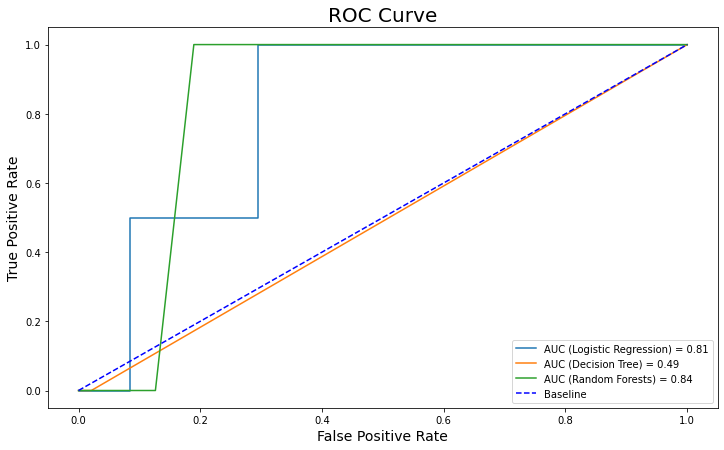

In [179]:
model_lr = LogisticRegression().fit(X_train, y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

model_dt = DecisionTreeClassifier().fit(X_train, y_train)
probs_dt = model_dt.predict_proba(X_test)[:, 1]

model_rf = RandomForestClassifier().fit(X_train, y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

auc_lr = roc_auc_score(y_test, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr)

auc_dt = roc_auc_score(y_test, probs_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, probs_dt)

auc_rf = roc_auc_score(y_test, probs_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probs_rf)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

In [161]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score,confusion_matrix,accuracy_score

X_train, X_test, y_train, y_test = preprocess_input(df)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(" trained.",": {:.2f}%".format(model.score(X_test, y_test) * 100))

 trained. : 94.85%


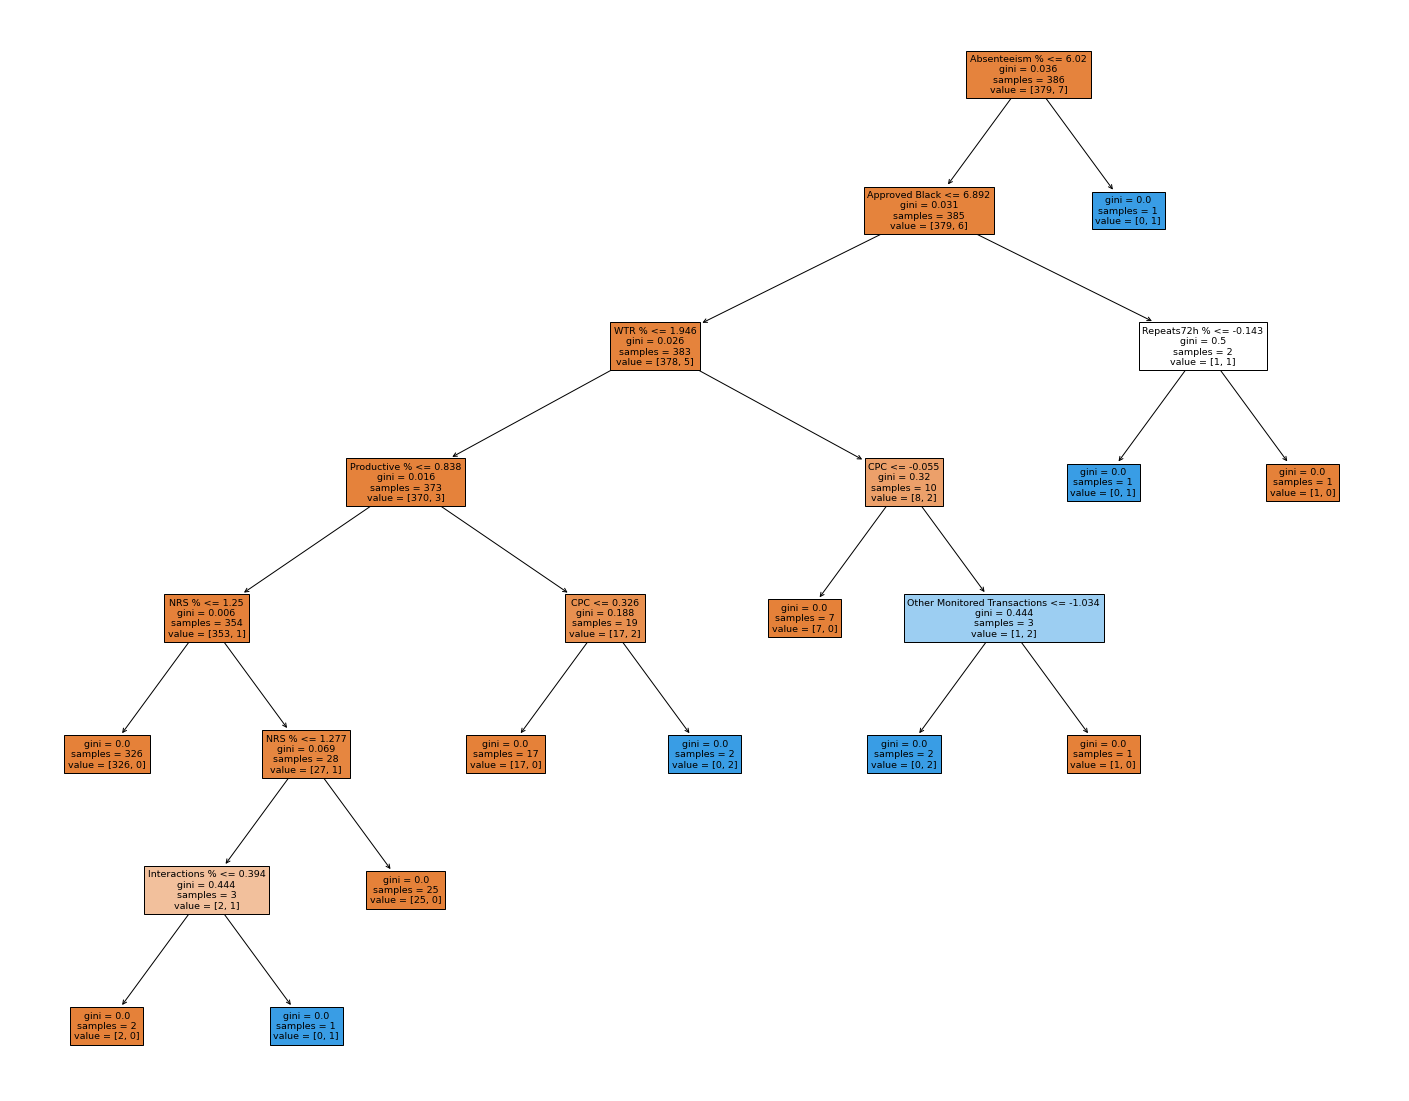

In [150]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,feature_names = X_train.columns,
                   filled=True)